<left> <font size=5 style='font-family:Courier New' color='Blue' > **Project 9 - Natural Language Processing (NLP):** 
<left> <font size=5 style='font-family:Courier New' color='Green' > **Twitter Sentiments Analysis**    

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Objective:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> Classifying the Tweets into Negative, Neutral, or Positive...

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Data Dictionary:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 1. **tweet_id:** A unique identifier for each tweet.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 2. **airline_sentiment:** The sentiment label of the tweet, such as positive, negative, or neutral.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 3. **airline_sentiment_confidence:** The confidence level associated with the sentiment label
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 4. **negativereason:** A category indicating the reason for negative sentiment.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 5. **negativereason_confidence:** The confidence level associated with the negative reason.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 6. **airline:** The airline associated with the tweet.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 7. **airline_sentiment_gold:** Gold standard sentiment label.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 8. **name:** The username of the tweet author.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 9. **negativereason_gold:**
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 10. **retweet_count:** The number of times the tweet has been retweeted.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 11. **text:** The actual text content of the tweet.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 12. **tweet_coord:** Coordinates of the tweet.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 13. **tweet_created:** The timestamp when the tweet was created.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 14. **tweet_location:** The location mentioned in the tweet.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 15. **user_timezone:** The timezone of the tweet author.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Case Understanding:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> Straightforward case that demonstrate the concept of Text Classification - Sentiment Analysis.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> We've a labelled Dataset that is classified according to customer tweets for different Airline companies; Such tweets belong to 3 main categories:
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Positive: Indicates a favourable or optimistic attitude towards the subject matter (Customer is satisfied with his experience).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Neutral: Sentiment expressed is neither positive nor negative, Tweets are relatively unbiased, lacks emotional tone, or does not express a clear opinion or sentiment towards the subject matter.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Negative: Indicates unfavourable or pessimistic attitude (Customer has negative opinions, emotions, or expressions of dissatisfaction, disappointment, and anger).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> Out of 15 available features, only "text" and "airline_sentiment" features are considered important and can be used to train our model and evaluate its accuracy in classifying the tweets. On the other hand, some other features like "airline" and "negativereason" look good in having more insights and helpful in drawing some recommendations.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> In order to build our ML Model, we will Start by fully understanding the Dataset then process the Tweets using different mechanism to extract the meaningful texts. 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> Accordingly, We will build a ML Model (Random Forest Classifier) to classify those tweets using different Vectorization Techniques (BOW and TF-IDF).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> Finally, In addition to build a model that can be used in real life to classify the sentiments in Social Media, we will draw the recommendations for Airline Companies to avoid Bad Customers Experience as well as what kind of action must be taken in order to improve the model accuracy in classifying such sentiments.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **1. Prework:**  

In [ ]:
# Data Reading and Manipulating:
import numpy as np
np.set_printoptions(threshold=np.inf)

import pandas as pd 
pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('mode.chained_assignment', None)

# Data Visualization:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()
sns.set_style(style = 'white')

# Regular Expressions Library:
import re

# Python Imaging Library:
from PIL import Image

# Natural Language Toolskit:
'''!pip install nltk'''
import nltk

# Spacy Library:
'''!pip install spacy==3.4.1
   !python -m spacy download en_core_web_sm'''
import spacy
from spacy.lang.en import English
spacy.load('en_core_web_sm')

# Taqaddum Library:
from tqdm import tqdm

# String Module:
import string

# Accented Characters Module:
'''!pip install unidecode'''
import unidecode

# Unicode Characters Module:
import unicodedata

# Words Root Module:
'''!pip install contractions'''
import contractions                                    

# Web Pages Extracting Module:
from bs4 import BeautifulSoup

# Spelling Correction Module:
'''!pip install autocorrect'''
from autocorrect import Speller

# Stopwords Removal Module:
from nltk.corpus import stopwords

# NLTK Module:
nltk.download('all')

# Stopwords Module:
nltk.download('punkt')

# Stemming and lemmatization Module:
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import (SnowballStemmer , LancasterStemmer , WordNetLemmatizer)

# Tokenization Module:
nltk.download('omw-1.4')
from nltk.tokenize import (word_tokenize , sent_tokenize)

# POS Tagging Module:
nltk.download('averaged_perceptron_tagger')

# NER Tagging Module:
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.corpus import treebank_chunk
from nltk.chunk import ne_chunk

# Vader Module:
nltk.download('vader_lexicon')

# Words Cloud Module:
from wordcloud import (WordCloud , STOPWORDS , ImageColorGenerator)

# Sentiment Analysis Module:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from textblob import TextBlob

# Words to Vector Module:
from gensim.models import Word2Vec

# SKLearn Module:
from sklearn.model_selection import (train_test_split , KFold , StratifiedKFold , cross_val_score ,
                                     GridSearchCV , RandomizedSearchCV)
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import (BaggingClassifier  , RandomForestClassifier ,
                              AdaBoostClassifier , GradientBoostingClassifier , StackingClassifier)
from sklearn import metrics
from sklearn.metrics import (f1_score , accuracy_score , recall_score , precision_score , confusion_matrix , 
                             roc_auc_score , precision_recall_curve , roc_curve , classification_report , r2_score , 
                             mean_squared_error , mean_absolute_error)
from sklearn.feature_extraction.text import (CountVectorizer , TfidfVectorizer) 
from sklearn.preprocessing import (FunctionTransformer , LabelEncoder , OneHotEncoder , KBinsDiscretizer)
from sklearn.impute import (SimpleImputer , KNNImputer)

# Tensor Flow Library:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (Embedding , LSTM , Dense , Dropout , SpatialDropout1D)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Time Module:
import time

# Supress Warning Library Module:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset 'csv file' then assign it to Variables:

filepath = 'Project_09_NaturalLanguageProcessing_TwitterSentimentsAnalysis_Dataset.csv'
tweets = pd.read_csv(filepath)

<left> <font size=6 style='font-family:Courier New' color='Orange' > **2. Dataset Overview:**  

In [3]:
# Checking the Shapes of the Dataset:

print('\033[0m' , '\033[92m' , 'Dataset consists of ' , 
      '\033[1m' , '\033[91m' , '{:,}'.format(tweets.shape[0]) , 
      '\033[0m' , '\033[92m' , ' Data Rows and ' , 
      '\033[1m' , '\033[91m' , tweets.shape[1] , 
      '\033[0m' , '\033[92m' , ' Features.' , sep='')

Dataset consists of 14,640 Data Rows and 15 Features.


In [4]:
# Viewing the first 5 Data Rows:

tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Viewing the last 5 Data Rows:

tweets.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Dataset contains 14,640 data rows and 15 features.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Initially, a lot of irrelevant features can be observed such as features that contains either unique identifiers, dates and times, time zones, etc. 

In [6]:
# Checking the Duplicate Data Rows:

print('\033[0m' , '\033[92m' , 'There are ' , 
      '\033[1m' , '\033[91m' , '{:,}'.format(tweets.duplicated().sum()) ,
      '\033[0m' , '\033[92m' , ' Duplicate Datarows in the Dataset!' , sep = '')

There are 36 Duplicate Datarows in the Dataset!


In [7]:
# Viewing the Duplicate Data Rows:

tweets[tweets.duplicated(keep=False)].sort_values("tweet_id")

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12001,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were retired? #MD80,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
12162,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were retired? #MD80,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
12159,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for laptop, iPhone, just missing a good boat-style swivel cup holder for my #dietcoke #happyflier","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
11998,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for laptop, iPhone, just missing a good boat-style swivel cup holder for my #dietcoke #happyflier","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
11997,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Thanks for sharing! 😁,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)
12158,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Thanks for sharing! 😁,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)
12157,570273819287531520,positive,1.0,NaN,NaN,American,NaN,GoldensPleasure,NaN,0,@AmericanAir Aww Thanks AA..DFW was on GMA up here this AM..so i understand ..Btw A.A is my Airline when im able to trv..Love you guys.:),NaN,2015-02-24 09:27:28 -0800,East Coast CT.,Central Time (US & Canada)
11996,570273819287531520,positive,1.0,NaN,NaN,American,NaN,GoldensPleasure,NaN,0,@AmericanAir Aww Thanks AA..DFW was on GMA up here this AM..so i understand ..Btw A.A is my Airline when im able to trv..Love you guys.:),NaN,2015-02-24 09:27:28 -0800,East Coast CT.,Central Time (US & Canada)
12155,570275010759102466,negative,1.0,Lost Luggage,1.0,American,NaN,paintbranch1398,NaN,0,@AmericanAir this delayed bag was for my friend Lisa Pafe. She got her bag after 3 days in Costa Rica. Issue no updates on your system.,NaN,2015-02-24 09:32:12 -0800,NaN,NaN
11994,570275010759102466,negative,1.0,Lost Luggage,1.0,American,NaN,paintbranch1398,NaN,0,@AmericanAir this delayed bag was for my friend Lisa Pafe. She got her bag after 3 days in Costa Rica. Issue no updates on your system.,NaN,2015-02-24 09:32:12 -0800,NaN,NaN


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** It's well observed that dataset contains 36 duplicate data rows; Such data rows must be dropped accordingly.

In [8]:
# Dropping the Duplicate Data Rows:

tweets = tweets.drop_duplicates(keep='first')
tweets = tweets.reset_index(drop=True)

In [9]:
# Re-Checking the Duplicate Data Rows:

print('\033[0m' , '\033[92m' , 'There are ' , 
      '\033[1m' , '\033[91m' , '{:,}'.format(tweets.duplicated().sum()) ,
      '\033[0m' , '\033[92m' , ' Duplicate Datarows in the Dataset!' , sep = '')

There are 0 Duplicate Datarows in the Dataset!


In [10]:
# Re-Checking the Shapes of the Dataset:

print('\033[0m' , '\033[92m' , 'Dataset consists of ' , 
      '\033[1m' , '\033[91m' , '{:,}'.format(tweets.shape[0]) , 
      '\033[0m' , '\033[92m' , ' Data Rows and ' , 
      '\033[1m' , '\033[91m' , tweets.shape[1] , 
      '\033[0m' , '\033[92m' , ' Features.' , sep='')

Dataset consists of 14,604 Data Rows and 15 Features.


In [11]:
# Checking the No. of Null Values in Data Rows:

features = tweets.columns.tolist()  

for column in features:
    null_values = tweets[column].isnull().sum()
    
    print('\033[0m' , '\033[92m' , 'Feature Name: ' , 
          '\033[1m' , '\033[91m' , f'{column:<30}' , 
          '\033[0m' , '\033[92m' , ' \tNo. of Null Entries: ' , 
          '\033[1m' , '\033[91m' , '{:,}'.format(null_values) , sep='')

Feature Name: tweet_id                       	No. of Null Entries: 0
Feature Name: airline_sentiment              	No. of Null Entries: 0
Feature Name: airline_sentiment_confidence   	No. of Null Entries: 0
Feature Name: negativereason                 	No. of Null Entries: 5,445
Feature Name: negativereason_confidence      	No. of Null Entries: 4,101
Feature Name: airline                        	No. of Null Entries: 0
Feature Name: airline_sentiment_gold         	No. of Null Entries: 14,564
Feature Name: name                           	No. of Null Entries: 0
Feature Name: negativereason_gold            	No. of Null Entries: 14,572
Feature Name: retweet_count                  	No. of Null Entries: 0
Feature Name: text                           	No. of Null Entries: 0
Feature Name: tweet_coord                    	No. of Null Entries: 13,589
Feature Name: tweet_created                  	No. of Null Entries: 0
Feature Name: tweet_location                 	No. of Null Entries: 4,723
Feature

In [12]:
# Checking the No. of Unique Values in Data Rows:

for column in features:
    unique_values = tweets[column].nunique()
    
    print('\033[0m' , '\033[92m' , 'Feature Name: ' , 
          '\033[1m' , '\033[91m' , f'{column:<30}' , 
          '\033[0m' , '\033[92m' , ' \tNo. of Unique Entries: ' , 
          '\033[1m' , '\033[91m' , '{:,}'.format(unique_values) , sep='')

Feature Name: tweet_id                       	No. of Unique Entries: 14,485
Feature Name: airline_sentiment              	No. of Unique Entries: 3
Feature Name: airline_sentiment_confidence   	No. of Unique Entries: 1,023
Feature Name: negativereason                 	No. of Unique Entries: 10
Feature Name: negativereason_confidence      	No. of Unique Entries: 1,410
Feature Name: airline                        	No. of Unique Entries: 6
Feature Name: airline_sentiment_gold         	No. of Unique Entries: 3
Feature Name: name                           	No. of Unique Entries: 7,701
Feature Name: negativereason_gold            	No. of Unique Entries: 13
Feature Name: retweet_count                  	No. of Unique Entries: 18
Feature Name: text                           	No. of Unique Entries: 14,427
Feature Name: tweet_coord                    	No. of Unique Entries: 832
Feature Name: tweet_created                  	No. of Unique Entries: 14,247
Feature Name: tweet_location                 

In [13]:
# Checking the Info of Dataset:

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14604 entries, 0 to 14603
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14604 non-null  int64  
 1   airline_sentiment             14604 non-null  object 
 2   airline_sentiment_confidence  14604 non-null  float64
 3   negativereason                9159 non-null   object 
 4   negativereason_confidence     10503 non-null  float64
 5   airline                       14604 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14604 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14604 non-null  int64  
 10  text                          14604 non-null  object 
 11  tweet_coord                   1015 non-null   object 
 12  tweet_created                 14604 non-null  object 
 13  t

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** "tweet_id" is Unique Identifier that Has huge No. of Unique Values; although some tweet_id is duplicated (No. of Unique Values < No. of Data Rows), the entire Data Rows are not duplicated. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** "airline_sentiment" is the Dependent/Target Feature that contains 3 Classes/Sentiments; It has the suitable data type (Object)  with no Null entries.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** "airline_sentiment_confidence", "negativereason", and "negativereason_confidence" has nothing to add in Modelling.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** "airline" Feature can be used to draw insights and build the recommendations; It contains 6 Airline Companies with no Null entries.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5:** "airline_sentiment_gold", "name", "negativereason_gold", and "retweet_count" has nothing to add in Modelling; They have either huge No. of Nulls or info that does not affect the sentiment.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6:** "text" Feature is the Independent Feature that contains the tweets literally as written by the customer; It has the suitable data type (Object) with no Null entries.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7:** "tweet_coord", "tweet_created", "tweet_location", and "user_timezone" has nothing to add in Modelling; They have either huge No. of Nulls or info that does not affect the sentiment.
<br> <left> <font size=3 style='font-family:Courier New' color='blue'> **-** Generally, "airline_sentiment" and "text" Features are the most important Features to build and train our ML Model; On the other hand, we can neglect the remaining features while building the model as they are either irrelevant, has a lot of null and/or unique value, or do not add value (Apart from modelling, some of those features can be used in drawing both Insights and Recommendations).   

<left> <font size=6 style='font-family:Courier New' color='Orange' > **3. Exploratory Data Analysis (EDA):**  

<left> <font size=5 style='font-family:Courier New' color='Orange' > **3.1 Univariate Analysis:**  

In [14]:
# Checking the Count of Sentiments in the Dataset:

print('\033[0m' , '\033[92m' , 'Positive Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(tweets['airline_sentiment'].value_counts()['positive']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(tweets['airline_sentiment'].value_counts()['positive']/len(tweets['airline_sentiment'])*100) , sep='')

print('\033[0m' , '\033[92m' , 'Neutral Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(tweets['airline_sentiment'].value_counts()['neutral']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(tweets['airline_sentiment'].value_counts()['neutral']/len(tweets['airline_sentiment'])*100) , sep='')

print('\033[0m' , '\033[92m' , 'Negative Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(tweets['airline_sentiment'].value_counts()['negative']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(tweets['airline_sentiment'].value_counts()['negative']/len(tweets['airline_sentiment'])*100) , sep='')

Positive Sentiments: 	2,354	16.12%
Neutral Sentiments: 	3,091	21.17%
Negative Sentiments: 	9,159	62.72%


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Quite Imbalance is well noted where the Negative Sentiment has more than 62% of total sentiments. 

In [15]:
# Defining a Function for Bar Plot:

def bar_plot (df , column):
    print('\033[0m' , '\033[92m' , 'Count Plot: ' , 
          '\033[1m' , '\033[91m' , column , '\n' 
          '\033[0m' , '\033[92m' , sep='')

    total = float(len(df[column]))
    plt.figure(figsize=(15 , 4))

    print(df[column].value_counts().sort_values(ascending=True))
    plot = sns.countplot(data=df , x = column , color = 'yellow' , 
                         order=df[column].value_counts(ascending=True).index)

    for p in plot.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height() * 0.5
        plot.annotate(percentage , (x, y) , ha='center' , va='center' , size=11 , color='darkgreen')

    #plot.xticks(rotation = 90)
    plot.set(xlabel=None)
    plot.xaxis.label.set_color('olive')
    plot.tick_params(axis='x', colors='olive' , rotation=90)
    plot.set(ylabel='Frequency')
    plot.yaxis.label.set_color('olive')
    plot.tick_params(axis='y', colors='olive')
    plt.show();

Count Plot: airline

Virgin America     504
Delta             2222
Southwest         2420
American          2723
US Airways        2913
United            3822
Name: airline, dtype: int64


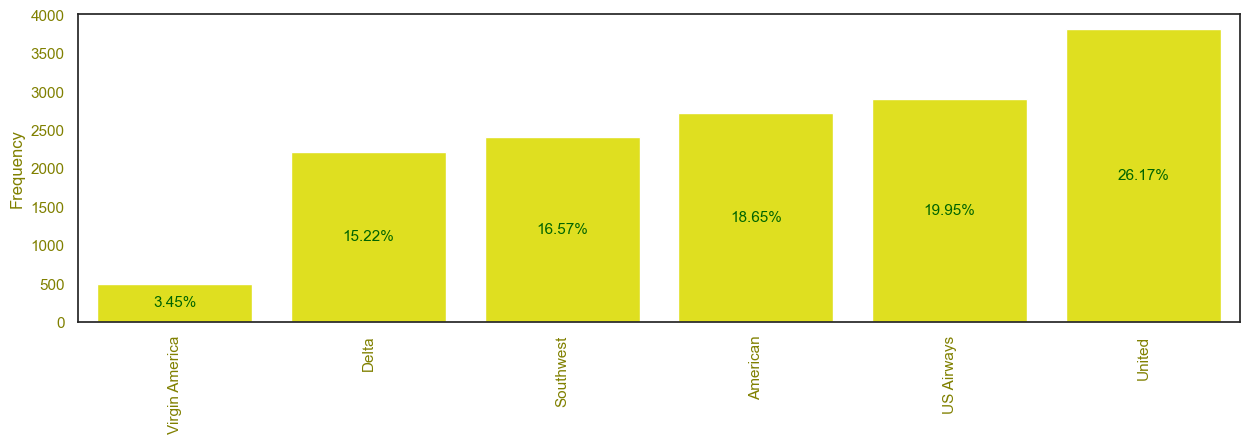

In [16]:
# Plotting the Distribution of Air Line:

bar_plot (tweets , 'airline')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** While "United" Airline has the largest No. of tweets comparing with other Airlines, "Virgin America" has the smallest No.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** No. of Tweets might reflect the size of Customers/Fleet.

Count Plot: airline_sentiment

positive    2354
neutral     3091
negative    9159
Name: airline_sentiment, dtype: int64


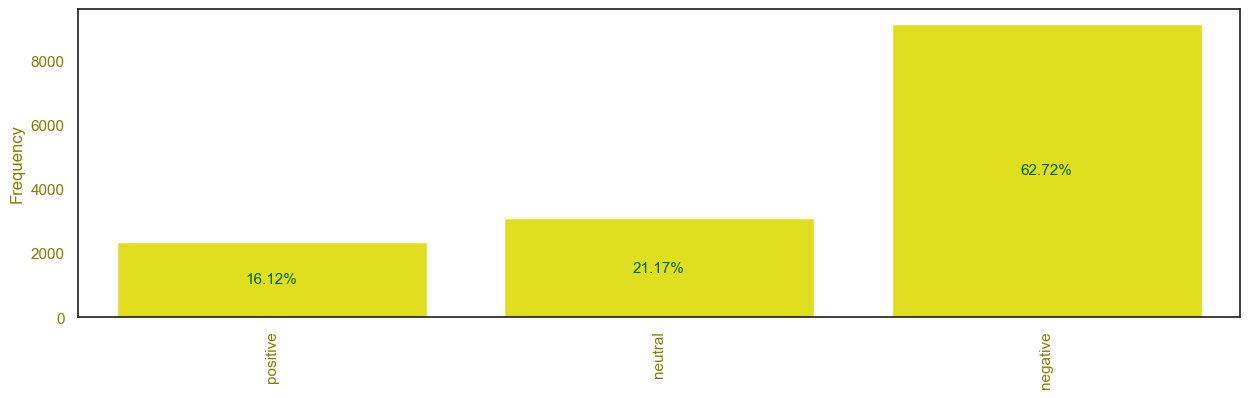

In [17]:
# Plotting the Distribution of Sentiment:

bar_plot (tweets , 'airline_sentiment')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Again, Imbalance is quite large since the Tweets are biased toward the "Negative" Sentiment more than both "Neutral" and "Positive".

Count Plot: negativereason

Damaged Luggage                  74
longlines                       178
Flight Attendant Complaints     480
Flight Booking Problems         529
Bad Flight                      580
Lost Luggage                    721
Cancelled Flight                843
Can't Tell                     1190
Late Flight                    1660
Customer Service Issue         2904
Name: negativereason, dtype: int64


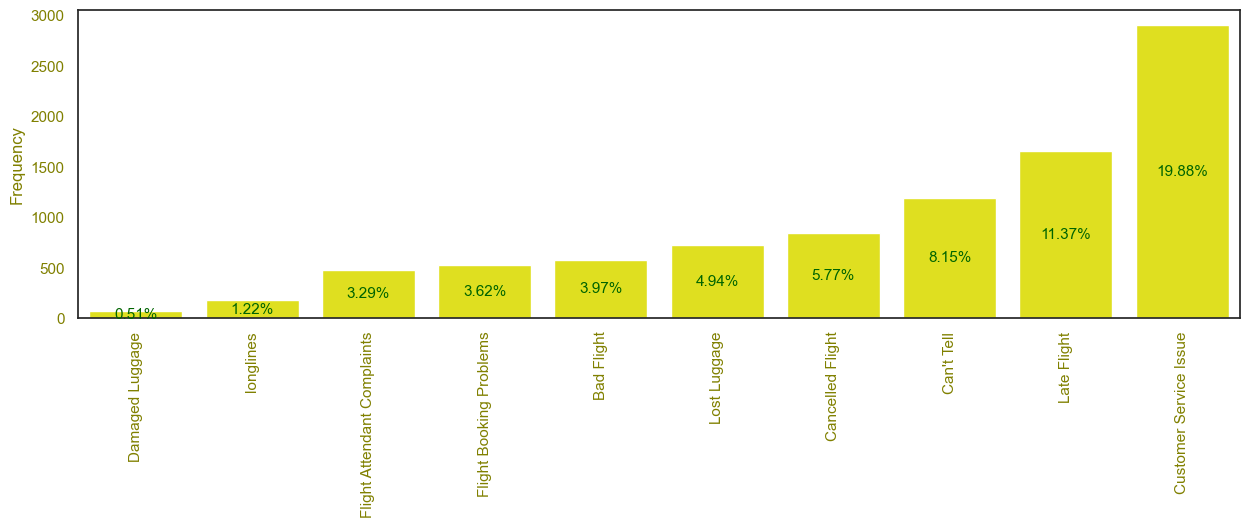

In [18]:
# Plotting the Distribution of Negative Reason:

bar_plot (tweets , 'negativereason')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** 19.88% of customers who have tweeted suffered from bad Customer Services.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Damaged Luggage and Long Lines represent small percentage in creating the customers bad experience. 

<left> <font size=5 style='font-family:Courier New' color='Orange' > **3.2 Bivariate Analysis:**  

In [19]:
# Exploring the Weekness in each Airline Company:

tweets.groupby(['airline'])['negativereason'].value_counts()

airline         negativereason             
American        Customer Service Issue         762
                Late Flight                    244
                Cancelled Flight               242
                Can't Tell                     198
                Lost Luggage                   146
                Flight Booking Problems        130
                Bad Flight                      87
                Flight Attendant Complaints     86
                longlines                       34
                Damaged Luggage                 12
Delta           Late Flight                    269
                Customer Service Issue         199
                Can't Tell                     186
                Bad Flight                      64
                Flight Attendant Complaints     60
                Lost Luggage                    57
                Cancelled Flight                51
                Flight Booking Problems         44
                longlines             

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Most of customers using "American", "Southwest", "US Airways", "United", and "Virgin America" Airline companies have suffered from bad customer services.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Most of customers using "Delta" Airline company have suffered from Late Flight.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Generally, Customer Service, Late Flight, and can't tell are the most important factors in creating the bad experience and thus lead to a Negative Sentiments.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** All Airline Companies perform somehow well in term of protecting the Luggage (Avoiding Damaging) and handling the boarding (Avoiding Long Lines).

Parplot: Airline vs Sentiment


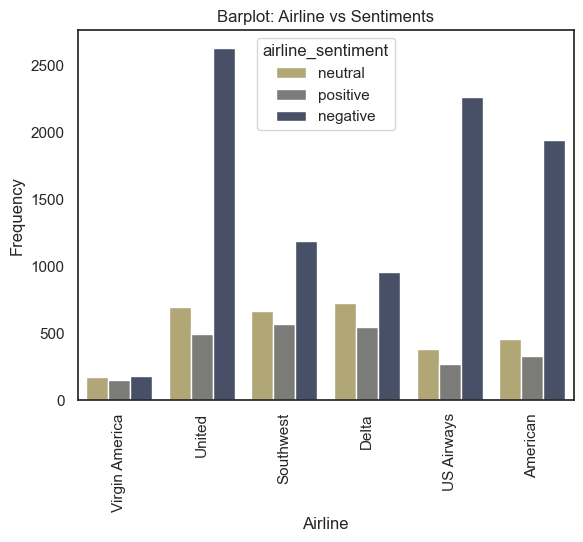

In [20]:
# Plotting the Distribution of Sentiment for each Airline:

print('\033[0m' , '\033[92m' , 'Parplot: ' , 
      '\033[1m' , '\033[91m' , 'Airline' , 
      '\033[0m' , '\033[92m' , ' vs ' , 
      '\033[1m' , '\033[91m' , 'Sentiment' , sep='')
    
sns.countplot(data= tweets , x='airline' , hue='airline_sentiment' , palette = "cividis_r")
plt.ylabel('Frequency')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.title('Barplot: Airline vs Sentiments')

plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** The most dissatisfaction is well noted between the customers of "United", "US Airways", and "American" Airline Companies.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Although of its small representation in the Dataset, "Virgin America" Airline Company perform better than the remaining companies in terms of achieving an equilibrium between customers sentiments.

In [21]:
# Defining a Function to plot the Words Cloud:
def plot_cloud(words):
    wordcloud = WordCloud(stopwords=STOPWORDS , background_color='white' , width=3000 , height=3000).generate(cleaned_word)  
    plt.figure(1 , figsize=(6,6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show() 

Words Cloud (Positive Sentiments):


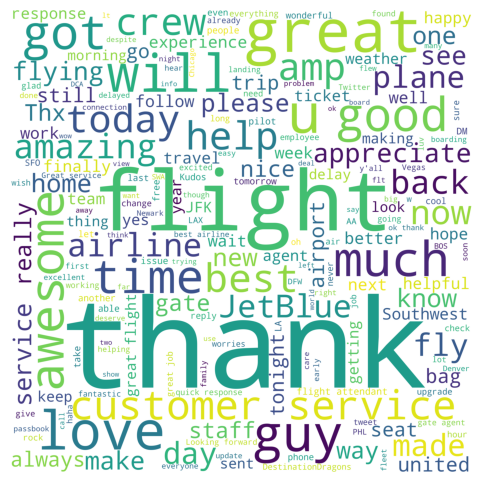

In [22]:
# Plotting the Words Cloud for Positive Sentiments - Before Text Processing:

print('\033[0m' , '\033[92m' , 'Words Cloud (' , 
      '\033[1m' , '\033[91m' , 'Positive Sentiments' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

positive_tweets=tweets[tweets['airline_sentiment']=='positive']

words = ' '.join(positive_tweets['text'])
cleaned_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

plot_cloud(cleaned_word)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Words like "thank", "flight", "good", "great", "love", and "awesome" have been used frequently by customers to describe their good feelings (Positive Sentiment); Such words are naturally reflect a Positive Feeling.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Although some words are a good indicator of good feelings, some of them can be used in describing any type of sentiments rather than positive ones ("flight", "service", "help", "please", etc.). i.e.: Customer may say "I need help" as well as " I got help"!

Words Cloud (Neutral Sentiments):


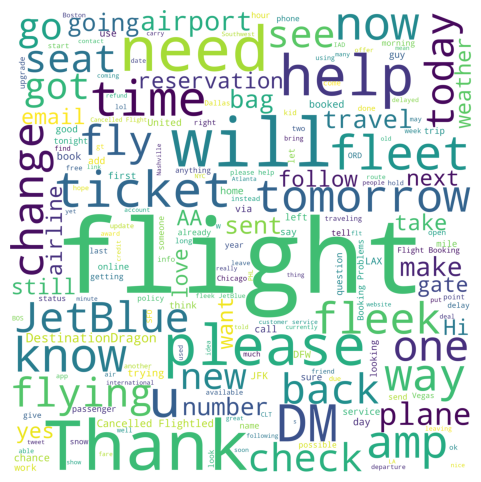

In [23]:
# Plotting the Words Cloud for Neutral Sentiments - Before Text Processing:

print('\033[0m' , '\033[92m' , 'Words Cloud (' , 
      '\033[1m' , '\033[91m' , 'Neutral Sentiments' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

neutral_tweets=tweets[tweets['airline_sentiment']=='neutral']

words = ' '.join(neutral_tweets['text'])
cleaned_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

plot_cloud(cleaned_word)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Words like "thank", "flight", "change", "ticket", "please", "will", and "thank" have been used frequently by customers to describe their neutral feelings (Neutral Sentiment); Such words are naturally can describe Negative Feelings as well as Neutral ones. Hence, such words add complexity to classify the tweets and my result in misclassification errors.

Words Cloud (Negative Sentiments):


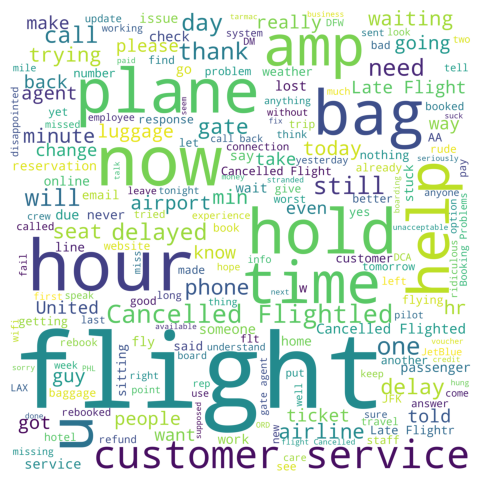

In [24]:
# Plotting the Words Cloud for Negative Sentiments - Before Text Processing:

print('\033[0m' , '\033[92m' , 'Words Cloud (' , 
      '\033[1m' , '\033[91m' , 'Negative Sentiments' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

negative_tweets=tweets[tweets['airline_sentiment']=='negative']

words = ' '.join(negative_tweets['text'])
cleaned_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

plot_cloud(cleaned_word)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Words like "hour", "flight", "bag", "hold", "time", "help", "delayed", "cancelled", and "please" have been used frequently by customers to describe their negative feelings (Negative Sentiment); Most of these words are naturally reflect a Negative Feeling while being used in complaining.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Although some words are a good indicator of bad feelings, some of them can be used in describing any type of sentiments rather than negative ones ("flight", "now", "plane", "service", etc.).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Many of words have been found in Positive, Neutral, and Negative Sentiments ("flight", "time", etc.) ; Hence, such words add complexity to classify the tweets and my result in misclassification errors.
<br> <left> <font size=3 style='font-family:Courier New' color='blue'> **-** Generally, the similarity between Neutral and Negative Tweets in terms of Words is noted, while the Positive Tweets have somehow their own words. As a result, good classification is expected for Negative Sentiments, while low quality classification with higher errors is expected for both Positive and Neutral Sentiments (Neutral Tweets suffer from high similarity with Negative Tweets).

In [25]:
# Investigating the Confidence of Classifications:

tweets.groupby(['airline_sentiment'])['airline_sentiment_confidence'].mean()

airline_sentiment
negative    0.933227
neutral     0.822846
positive    0.871550
Name: airline_sentiment_confidence, dtype: float64

In [26]:
# Investigating the Retweeting of Classifications:

tweets.groupby(['airline_sentiment'])['retweet_count'].sum()

airline_sentiment
negative    856
neutral     189
positive    164
Name: retweet_count, dtype: int64

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Higher confidence in classification is well noted for Negative Sentiments; Such high confidence may lead to higher accuracy as well as lower Misclassification errors.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** On the other hand, lower confidence in classification is well noted for Neutral Sentiments; Such low confidence may lead to lower accuracy as well as higher Misclassification errors.

<left> <font size=5 style='font-family:Courier New' color='Blue' > **Insights:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The Dataset measures the customers feelings for 6 Airline companies; It consists of 14,604 customers tweets (After removing 36 duplicated Tweets) and 15 Features:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **tweet_id** Feature: It's Unique Identifier that contain a huge No. of Unique Values; Thus, such feature has no adding value in either exploring or modelling.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **airline_sentiment** Feature: It's the Target/Dependent/Labels Feature that contain 3 types of sentiments (Positive, Neutral, and Negative); Thus, such feature has important role in exploring and crucial one in modelling.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **airline_sentiment_confidence** Feature: It measures the confidence in Classification with Values from 0 to 1; Although it has nothing to do with Modelling, it can be used to judge the accuracy of current Classification.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **negativereason** Feature: It summarize the reason behind Negative Sentiment; Although it has huge No. of Null Entries, it contains 10 unique entries that can be used to understand the reason behind such bad customer experience.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **negativereason_confidence** Feature: It measures the confidence in summarizing the Negative Reason with Values from 0 to 1; Thus, such feature has no adding value in either exploring or modeling.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **airline** Feature: It contains 6 different Airline Companies; Although it has nothing to do with Modelling, it can be used in conjunction with Airline Sentiment to understand the customer experience.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **airline_sentiment_gold** Feature: It's almost null with no adding value in either exploring or modelling.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **name** Feature: Represents either the Customer Name or Twitter Account Name; ; Thus, such feature consists of huge No. of Unique Entries and has no adding value in either exploring or modeling.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **negativereason_gold** Feature: It's almost null with no adding value in either exploring or modelling.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **retweet_count** Feature: Represents how many times a Tweet has been retweeted by - Usually - a different user; It can be used to discover how many customers have faced the same experience.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **text** Feature: It's the Independent Feature that contain the result of customer experiences; Thus, such feature has important role in exploring and crucial one in modelling.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **tweet_coord,	tweet_created,	tweet_location, and	user_timezone** Features: Additional info that add no value to either exploring or modelling.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Generally, the most important features for Modeling (airline_sentiment and text) have neither anomalies nor null values as well as suitable data type (Object).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Text Feature must be pre-processed as it contains different kind of meaningless components such as Airline Name, HTTPs, Emojis, etc.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Quite Imbalance is found between Labels where the Negative Sentiments has the largest representation with more than 60%.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** While United Airline has the largest No. of Tweets (3822), Virgin America has the smallest (504); Consequently, No. of Tweets may indicate the No. of Tweets may indicate the Customers base size whether small or large.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The customers of United, US Airways, and American Airline Company have reported negative sentiments in their Tweets more than other Airline Companies; On the other hand, the customers of Virgin America Airline Company have reported - almost - similar sentiments.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The reasons behind the majority of Negative sentiments for all Airline Companies are either the Customer Service, Late Flight, or Can't Tell.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Although of different reasons behind bad customer experience, all Airline Companies perform well in terms of protecting the Luggage (Avoiding Damaging) and handling the boarding (Avoiding Long Lines).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Higher confidence in classification is well noted for Negative Sentiments while a lower one is noted for Neutral Sentiments.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Tweets that have Negative Sentiments have been retweeted much more than other Tweets with either Positive or Neutral Sentiments; Such indicator might be interpreted to worse senario in real life where more different customers have bad feelings but not share it in social media.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Words that express Good Feeling have been found in Positive Sentiments (thank, awesome, good, great, love, etc). 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Although of some Words that express Neutral Feeling have been found in Neutral Sentiments (ticket, now, flying, know, etc), the similarity between such tweets and  Negative Tweets is noted where many words occur in both Sentiments (flight, time, help need, etc.).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Words that express Bad Feeling have been found in Negative Sentiments (help, bag, hold, luggage, cancelled flighted, etc ).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Generally, Tweets with either Negative or Positive Sentiments have better expressive words that help in better modelling; Consequently, a higher accuracy in classification is expected for such tweets.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **4. Data Preparation:**  

In [27]:
# Selecting the Important Features for Modeleing:

data = tweets[['text' , 'airline_sentiment']]

In [28]:
# Checking the Shapes of the Dataset:

print('\033[0m' , '\033[92m' , 'Dataset consists of ' , 
      '\033[1m' , '\033[91m' , '{:,}'.format(data.shape[0]) , 
      '\033[0m' , '\033[92m' , ' Data Rows and ' , 
      '\033[1m' , '\033[91m' , data.shape[1] , 
      '\033[0m' , '\033[92m' , ' Features.' , sep='')

Dataset consists of 14,604 Data Rows and 2 Features.


In [29]:
# Viewing the first 5 Data Rows:

data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [30]:
# Viewing the last 5 Data Rows:

data.tail()

,text,airline_sentiment
14599,@AmericanAir thank you we got on a different flight to Chicago.,positive
14600,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,negative
14601,@AmericanAir Please bring American Airlines to #BlackBerry10,neutral
14602,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",negative
14603,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,neutral


In [31]:
# Checking the No. of Null Values in Data Rows:

features = data.columns.tolist()  

for column in features:
    null_values = data[column].isnull().sum()
    
    print('\033[0m' , '\033[92m' , 'Feature Name: ' , 
          '\033[1m' , '\033[91m' , f'{column:<30}' , 
          '\033[0m' , '\033[92m' , ' \tNo. of Null Entries: ' , 
          '\033[1m' , '\033[91m' , '{:,}'.format(null_values) , sep='')

Feature Name: text                           	No. of Null Entries: 0
Feature Name: airline_sentiment              	No. of Null Entries: 0


In [32]:
# Checking the No. of Unique Values in Data Rows:

for column in features:
    unique_values = data[column].nunique()
    
    print('\033[0m' , '\033[92m' , 'Feature Name: ' , 
          '\033[1m' , '\033[91m' , f'{column:<30}' , 
          '\033[0m' , '\033[92m' , ' \tNo. of Unique Entries: ' , 
          '\033[1m' , '\033[91m' , '{:,}'.format(unique_values) , sep='')

Feature Name: text                           	No. of Unique Entries: 14,427
Feature Name: airline_sentiment              	No. of Unique Entries: 3


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Dataset contains 14,604 Data Roes, 2 Features, and has no Null Values.

In [33]:
# Selecting a Sample Text to track the Preprocessing:

data.loc[[67,336,9991] , 'text']

67                                 @VirginAmerica Hi, Virgin! I'm on hold for 40-50 minutes -- are there any earlier flights from LA to NYC tonight; earlier than 11:50pm?
336                         @VirginAmerica Many Thanks for the Follow.\n#ourprincess #freyasfund #USA #Bandie \nLooking for Any Help😍\n💗🇬🇧💗🇺🇸💗\n🎀🌏🎀 http://t.co/UJfS9Zi6kd
9991    @USAirways  you Cancelled Flighted &amp; rescheduled my flight &amp; still getting updates &amp; can't find my current flight on my account http://t.co/8Je1h3666w
Name: text, dtype: object

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Airline Name, Punctuations, Special Characters, Numbers, New Lines, some  Stop Words, Http, and Emojis add no values and must be removed to have a better meaningful Text. 

In [34]:
# Stripping the HTMLs:

def strip_html(text):
    soup = BeautifulSoup(text, 'html.parser')                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.loc[[67,336,9991] , 'text']

67                     @VirginAmerica Hi, Virgin! I'm on hold for 40-50 minutes -- are there any earlier flights from LA to NYC tonight; earlier than 11:50pm?
336             @VirginAmerica Many Thanks for the Follow.\n#ourprincess #freyasfund #USA #Bandie \nLooking for Any Help😍\n💗🇬🇧💗🇺🇸💗\n🎀🌏🎀 http://t.co/UJfS9Zi6kd
9991    @USAirways  you Cancelled Flighted & rescheduled my flight & still getting updates & can't find my current flight on my account http://t.co/8Je1h3666w
Name: text, dtype: object

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** No change has been noticed when using "html.parser"! It's expected as the Original Tweets are already included in the Corpus and nothing more to be extracted.<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Original Tweet (336):**

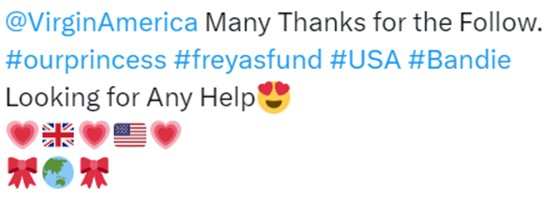

In [35]:
# Removing the Hash Tags:
'''
def remove_airline(text):
  text = re.sub(r'#\w+', '', text)
  return text

data['text'] = data['text'].apply(lambda x : remove_airline(x))

data.loc[[67,336,9991] , 'text']
'''

"\ndef remove_airline(text):\n  text = re.sub(r'#\\w+', '', text)\n  return text\n\ndata['text'] = data['text'].apply(lambda x : remove_airline(x))\n\ndata.loc[[67,336,9991] , 'text']\n"

In [36]:
# Removing the Airline Names:

def remove_airline(text):
  text = re.sub(r'@\w+', '', text)
  return text

data['text'] = data['text'].apply(lambda x : remove_airline(x))

data.loc[[67,336,9991] , 'text']

67                          Hi, Virgin! I'm on hold for 40-50 minutes -- are there any earlier flights from LA to NYC tonight; earlier than 11:50pm?
336                  Many Thanks for the Follow.\n#ourprincess #freyasfund #USA #Bandie \nLooking for Any Help😍\n💗🇬🇧💗🇺🇸💗\n🎀🌏🎀 http://t.co/UJfS9Zi6kd
9991      you Cancelled Flighted & rescheduled my flight & still getting updates & can't find my current flight on my account http://t.co/8Je1h3666w
Name: text, dtype: object

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Airline Names have been removed from all Documents/Tweets. It adds no value as it found in all Documents/Tweets and can be used in describing any kind of Sentiments.

In [37]:
# Removing the URLs and HTMLs:

def remove_links(text):
    text = re.sub(r'http?://\S+|www\.\S+', '', text) 
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '' , text)
    return text
  
data['text'] = data['text'].apply(lambda x : remove_links(x))

data.loc[[67,336,9991] , 'text']

67       Hi, Virgin! I'm on hold for 40-50 minutes -- are there any earlier flights from LA to NYC tonight; earlier than 11:50pm?
336                     Many Thanks for the Follow.\n#ourprincess #freyasfund #USA #Bandie \nLooking for Any Help😍\n💗🇬🇧💗🇺🇸💗\n🎀🌏🎀 
9991         you Cancelled Flighted & rescheduled my flight & still getting updates & can't find my current flight on my account 
Name: text, dtype: object

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** HTMLs have been removed from all Documents/Tweets.

In [38]:
# Replacing the Contractions:

def replace_contractions(text):
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

data.loc[[67,336,9991] , 'text']

67       Hi, Virgin! I am on hold for 40-50 minutes -- are there any earlier flights from LA to NYC tonight; earlier than 11:50pm?
336                      Many Thanks for the Follow.\n#ourprincess #freyasfund #USA #Bandie \nLooking for Any Help😍\n💗🇬🇧💗🇺🇸💗\n🎀🌏🎀 
9991         you Cancelled Flighted & rescheduled my flight & still getting updates & cannot find my current flight on my account 
Name: text, dtype: object

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Contractions have been replaced in all Documents/Tweets (I'm --> I am, can't --> cannot, etc.).

In [39]:
# Removing the Numbers:

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))

data.loc[[67,336,9991] , 'text']

67            Hi, Virgin! I am on hold for - minutes -- are there any earlier flights from LA to NYC tonight; earlier than :pm?
336                   Many Thanks for the Follow.\n#ourprincess #freyasfund #USA #Bandie \nLooking for Any Help😍\n💗🇬🇧💗🇺🇸💗\n🎀🌏🎀 
9991      you Cancelled Flighted & rescheduled my flight & still getting updates & cannot find my current flight on my account 
Name: text, dtype: object

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Numbers have been removed from all Documents/Tweets (40-50 --> -, etc.).

In [40]:
# Applying the Tokenization:

data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']) , axis=1)

data.loc[[67,336,9991] , 'text']

67      [Hi, ,, Virgin, !, I, am, on, hold, for, -, minutes, --, are, there, any, earlier, flights, from, LA, to, NYC, tonight, ;, earlier, than, :, pm, ?]
336                           [Many, Thanks, for, the, Follow, ., #, ourprincess, #, freyasfund, #, USA, #, Bandie, Looking, for, Any, Help😍, 💗🇬🇧💗🇺🇸💗, 🎀🌏🎀]
9991            [you, Cancelled, Flighted, &, rescheduled, my, flight, &, still, getting, updates, &, can, not, find, my, current, flight, on, my, account]
Name: text, dtype: object

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Words have been tokenized in all Documents/Tweets (Each Block of contiguous Letters/Characters, Punctuation, or White Space is considered as single Token).

In [41]:
# Customizing the Stop Words List:

stopwords = stopwords.words('english')

excluded_list = ["not" , "couldn't" , "didn" , "didn't" , "doesn" , "doesn't" , "hadn" , "hadn't" , "hasn" ,
                 "hasn't" , "haven" , "haven't" , "isn" , "isn't" , "ma", "mightn", "mightn't", "mustn" ,
                 "mustn't", "needn" , "needn't" , "shan" , "shan't" , "shouldn" , "shouldn't" , "wasn" ,
                 "wasn't" , "weren" , "weren't" , "won" , "won't" , "wouldn" , "wouldn't" , "don" , "don't"]

stopwords = list(set(stopwords) - set(excluded_list))

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Customizing the Stop Words by keeping some of Words that have an important rule in determining the meaning of a Tweet/Document (Ex.: I love <> I don't love).

In [42]:
# Pre-Processing Functions:

lemmatizer = WordNetLemmatizer()

# Remove non-ASCII characters from list of tokenized words:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD' , word).encode('ascii' , 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# Convert all characters to lowercase from list of tokenized words:
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
    
# Remove punctuation from list of tokenized words:
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]' , '' , word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove stop words from list of tokenized words:
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word , pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']) , axis=1)

data.loc[[67,336,9991] , 'text']

67                       hi virgin hold minutes earlier flight la nyc tonight earlier pm
336                        many thank follow ourprincess freyasfund usa bandie look help
9991    cancel flight reschedule flight still get update not find current flight account
Name: text, dtype: object

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Words have been lower-cased in all Documents/Tweets (Hi --> hi, Many --> many, etc.).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Tweets/Documents are now ready for Modeling; non-ASCII characters, Punctuations, and Customized Stop Words have been removed.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Words have been lemmatized in all Documents/Tweets (flights --> flight, rescheduled --> reschedule, etc.).

Words Cloud (Positive Sentiments):


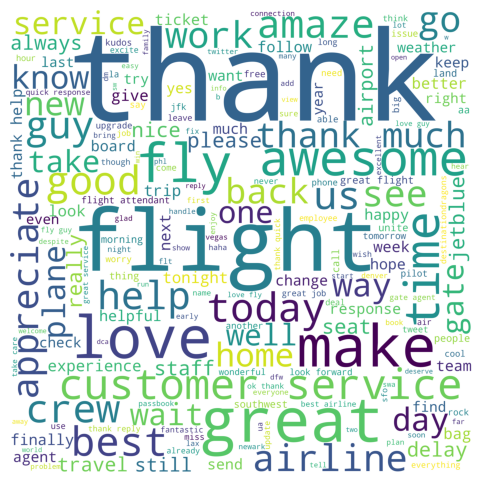

In [43]:
# Plotting the Words Cloud for Positive Sentiments - After Text Processing:

print('\033[0m' , '\033[92m' , 'Words Cloud (' , 
      '\033[1m' , '\033[91m' , 'Positive Sentiments' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

positive_tweets=data[data['airline_sentiment']=='positive']

words = ' '.join(positive_tweets['text'])
cleaned_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

plot_cloud(cleaned_word)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Words Cloud of Positive Sentiments after Text Pre-Processing looks similar to its shape before Text Pre-Processing.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Some words have now larger size (customer, service, airline).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Some Stop Words have been removed (Will).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Some Words have been lemmatized (flying, amazing).

Words Cloud (Neutral Sentiments):


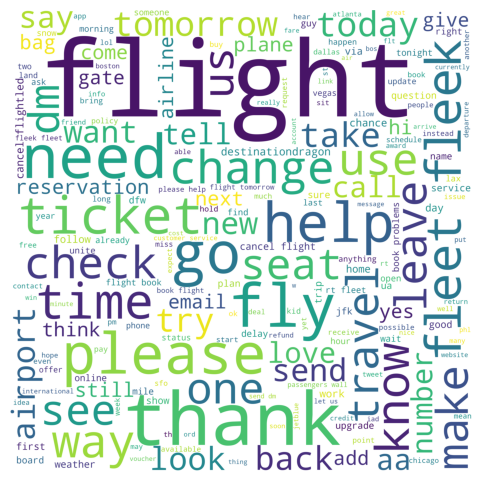

In [44]:
# Plotting the Words Cloud for Neutral Sentiments - After Text Processing:

print('\033[0m' , '\033[92m' , 'Words Cloud (' , 
      '\033[1m' , '\033[91m' , 'Neutral Sentiments' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

neutral_tweets=data[data['airline_sentiment']=='neutral']

words = ' '.join(neutral_tweets['text'])
cleaned_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

plot_cloud(cleaned_word)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Words Cloud of Neutral Sentiments after Text Pre-Processing looks similar to its shape before Text Pre-Processing.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Some words have now smaller size (Customer, change, dm).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Some Stop Words have been removed (Will).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Some Words have been lemmatized (flying).

Words Cloud (Negative Sentiments):


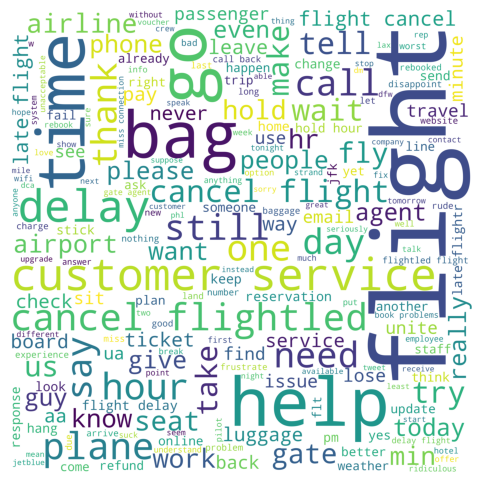

In [45]:
# Plotting the Words Cloud for Negative Sentiments - After Text Processing:

print('\033[0m' , '\033[92m' , 'Words Cloud (' , 
      '\033[1m' , '\033[91m' , 'Negative Sentiments' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

negative_tweets=data[data['airline_sentiment']=='negative']

words = ' '.join(negative_tweets['text'])
cleaned_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

plot_cloud(cleaned_word)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Words Cloud of Negative Sentiments after Text Pre-Processing looks similar to its shape before Text Pre-Processing.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Some words have now smaller size (cancel,  flighted).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Some Stop Words have been removed (Will).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Some Words have been lemmatized (cancelled, delayed).
<br> <left> <font size=3 style='font-family:Courier New' color='blue'> **-** Generally, the similarity between the Positive and Neutral Sentiments is noted (thank and help words are occured in both); On the other hand, we can notice that some words are occured in all sentiments (flight word).

<left> <font size=6 style='font-family:Courier New' color='Orange' > **5. Model Building:**  

<left> <font size=5 style='font-family:Courier New' color='Orange' > **5.1 Bag of Words (Count Vectorizer):**  

In [46]:
# Building the Vocabulary:

bow_vec = CountVectorizer(max_features=4000)
data_features = bow_vec.fit_transform(data['text']).toarray()
data_features.shape

(14604, 4000)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** By selecting a Vocabulary Size of 4,000; Each Tweet/Document will be represented with a Vector of length equals to 4,000.

In [47]:
# Viewing the Vocabulary:

print('Vocabulary: \n' , bow_vec.vocabulary_)

Vocabulary: 
 {'say': 3135, 'plus': 2694, 'add': 52, 'commercials': 724, 'experience': 1280, 'not': 2393, 'today': 3600, 'must': 2316, 'mean': 2191, 'need': 2341, 'take': 3488, 'another': 181, 'trip': 3652, 'really': 2871, 'aggressive': 85, 'blast': 458, 'entertainment': 1208, 'guests': 1558, 'face': 1298, 'little': 2063, 'recourse': 2891, 'big': 431, 'bad': 337, 'thing': 3552, 'seriously': 3204, 'would': 3937, 'pay': 2605, 'flight': 1382, 'seat': 3166, 'play': 2684, 'fly': 1402, 'va': 3761, 'yes': 3972, 'nearly': 2339, 'every': 1246, 'time': 3584, 'vx': 3801, 'ear': 1127, 'go': 1515, 'away': 319, 'miss': 2253, 'prime': 2758, 'opportunity': 2478, 'men': 2208, 'without': 3900, 'hat': 1595, 'well': 3858, 'amaze': 147, 'arrive': 242, 'hour': 1684, 'early': 1130, 'good': 1523, 'know': 1968, 'suicide': 3436, 'second': 3172, 'lead': 2014, 'death': 907, 'among': 158, 'teens': 3515, 'pretty': 2749, 'much': 2310, 'better': 420, 'great': 1540, 'deal': 905, 'already': 134, 'think': 3554, 'nd': 23

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Dictionary has been created to include the most 4,000 Frequent Words in the entire corpus (starting from 0 index till 3,999).

In [48]:
# Viewing the Non-Zero Elements in a sample BOW-Vector:

sample_bow = []
for i in data_features[9901]:
    if i !=0:
        sample_bow.append(i)
print(sample_bow)

[1, 1, 1, 2, 1, 1, 1, 1, 1]


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Using Bag of Words Mechanism, Integer Numbers are used to represent the No. of Occurrences of each Word in each Tweet/Document.

In [49]:
# Splitting the Dataset into Independent and Dependent/Target Variables:

X = data_features                                             
y = data['airline_sentiment']

In [50]:
# Splitting the Independent and Dependent Variables into Training and Testing Subsets:

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 1 , stratify = y)

In [51]:
# Checking the Shapes of Dataset, Training, and Testing Subsets:

print('\033[1m' , '\033[91m' , 'Dataset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'Dataset Shape: ' , data.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Subsets:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X Shape: ' , X.shape , sep='')
print('\033[0m' , '\033[92m' , 'y Shape: ' , y.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Training Subset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X_train Shape: ' , X_train.shape , sep='')
print('\033[0m' , '\033[92m' , 'y_train Shape: ' , y_train.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Testing Subset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X_test Shape: ' , X_test.shape , sep='')
print('\033[0m' , '\033[92m' , 'y_test Shape: ' , y_test.shape , sep='')

Dataset:
Dataset Shape: (14604, 2)

----------------------------------------

Subsets:
X Shape: (14604, 4000)
y Shape: (14604,)

----------------------------------------

Training Subset:
X_train Shape: (11683, 4000)
y_train Shape: (11683,)

----------------------------------------

Testing Subset:
X_test Shape: (2921, 4000)
y_test Shape: (2921,)


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Using 0.80 - 0.20 Splitting Ratio, Training and Testing Subsets have been created.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Each Document/Tweet in the Training and Testing Subsets has been encoded using Bag of Word Mechanism; The result is a Vector of Length equals to 4,000.

In [52]:
# Checking the Sentiments of Dataset, Training, and Testing Subsets:

print('\033[1m' , '\033[91m' , 'Dataset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'Positive Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(data['airline_sentiment'].value_counts()['positive']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(data['airline_sentiment'].value_counts()['positive']/len(data['airline_sentiment'])*100) , sep='')

print('\033[0m' , '\033[92m' , 'Neutral Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(data['airline_sentiment'].value_counts()['neutral']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(data['airline_sentiment'].value_counts()['neutral']/len(data['airline_sentiment'])*100) , sep='')

print('\033[0m' , '\033[92m' , 'Negative Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(data['airline_sentiment'].value_counts()['negative']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(data['airline_sentiment'].value_counts()['negative']/len(data['airline_sentiment'])*100) , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'y_train:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'Positive Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_train.value_counts()['positive']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_train.value_counts()['positive']/len(y_train)*100) , sep='')

print('\033[0m' , '\033[92m' , 'Neutral Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_train.value_counts()['neutral']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_train.value_counts()['neutral']/len(y_train)*100) , sep='')

print('\033[0m' , '\033[92m' , 'Negative Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_train.value_counts()['negative']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_train.value_counts()['negative']/len(y_train)*100) , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'y_test:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'Positive Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_test.value_counts()['positive']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_test.value_counts()['positive']/len(y_test)*100) , sep='')

print('\033[0m' , '\033[92m' , 'Neutral Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_test.value_counts()['neutral']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_test.value_counts()['neutral']/len(y_test)*100) , sep='')

print('\033[0m' , '\033[92m' , 'Negative Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_test.value_counts()['negative']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_test.value_counts()['negative']/len(y_test)*100) , sep='')

Dataset:
Positive Sentiments: 	2,354	16.12%
Neutral Sentiments: 	3,091	21.17%
Negative Sentiments: 	9,159	62.72%

----------------------------------------

y_train:
Positive Sentiments: 	1,883	16.12%
Neutral Sentiments: 	2,473	21.17%
Negative Sentiments: 	7,327	62.72%

----------------------------------------

y_test:
Positive Sentiments: 	471	16.12%
Neutral Sentiments: 	618	21.16%
Negative Sentiments: 	1,832	62.72%


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** As observed, the Distribution of Classes (Sentiments) has been maintained; i.e.: Ratio of Sentiments has been kept the same across y_train and y_test.

In [53]:
# Building the Model:

model = RandomForestClassifier(n_estimators=10 , n_jobs=4 , random_state=1)

In [54]:
# Fitting the Model on Training Subset:

model = model.fit(X_train , y_train)

print('\033[0m' , '\033[92m' , 'Model Parameters: ' , '\033[90m' , model , sep='')

print('\033[0m' , '\033[92m' , 'Average Cross Validation Score: ' , '\033[90m' , '{:.4f}'.format(np.mean(cross_val_score(model , X_train , y_train , cv=5))) , sep='')

Model Parameters: RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=1)
Average Cross Validation Score: 0.7545


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Default Random Forest Classefier using 10 Base Learners, 5 Folds, and BOW Vectorization Mechanism is able to offer an Accuracy equals to 0.7545 on Training Subset.

In [55]:
# Calculating the Average Cross Validation Score (Accuracy) for different Base Learners:

start_time = time.time()

base_ln = [x for x in range(1,101,10)]
cv_accuracy = [] 

for b in base_ln:
    clf = RandomForestClassifier(n_estimators=b , n_jobs=4 , random_state=1)                                                
    scores = cross_val_score(clf , X_train , y_train , cv = 5 , scoring = 'accuracy')          
    cv_accuracy.append(scores.mean())

end_time = time.time()
elapsed_time_1 = end_time - start_time
print('\033[1m' , '\033[94m' , '\nExecution Time = ' , '{:.5f}'.format(elapsed_time_1) , ' Seconds!' , sep='')


Execution Time = 259.24713 Seconds!


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Quite large time has been consumed to find the corresponding Accuracy for different choices of Base Learners.

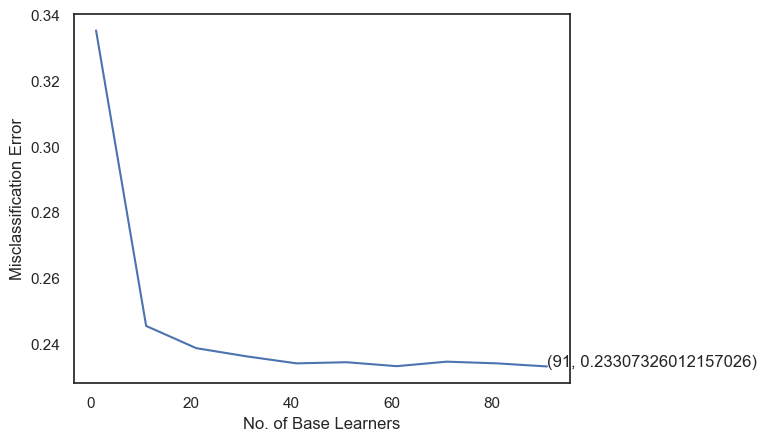

In [56]:
# Plotting the Average Classification Error (1 - Accuracy) for different Base Learners:

error = [1 - x for x in cv_accuracy]
optimal_learners = base_ln[error.index(min(error))]
plt.plot(base_ln , error)
xy = (optimal_learners , min(error))
plt.annotate('(%s, %s)' % xy , xy = xy , textcoords='data')
plt.xlabel("No. of Base Learners")
plt.ylabel("Misclassification Error")
plt.show();

In [57]:
print('\033[0m' , '\033[92m' , 'Optimal Model: ' , '\n' , 
      '\033[0m' , '\033[92m' , 'Base Learners = ' ,  
      '\033[1m' , '\033[91m' , optimal_learners , '\n' , 
      '\033[0m' , '\033[92m' , 'Accuracy = ' ,  
      '\033[1m' , '\033[91m' ,'{:.5f}'.format(1 - min(error)) , '\n' ,
      '\033[0m' , '\033[92m' , 'Error = ' ,  
      '\033[1m' , '\033[91m' ,'{:.5f}'.format(min(error)) , sep='')

Optimal Model: 
Base Learners = 91
Accuracy = 0.76693
Error = 0.23307


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** The best Random Forest Classefier with the highest Accuracy/lowest Error has been acheived using 91 Base Learners.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Such model has an accuracy of 0.76693 on Training Subset.

In [58]:
# Building the Model using the best Base Learners:

model_1 = RandomForestClassifier(n_estimators=optimal_learners , n_jobs=4 , random_state=1)

In [59]:
# Fitting the Model on Training Subset:

model_1 = model_1.fit(X_train , y_train)

print('\033[0m' , '\033[92m' , 'Model Parameters: ' , '\033[90m' , model_1 , sep='')

Model Parameters: RandomForestClassifier(n_estimators=91, n_jobs=4, random_state=1)


In [60]:
# Evaluating the Model on Testing Subset:

print('\033[0m' , '\033[92m' , 'Accuracy (Testing Subset) = ' ,  
      '\033[1m' , '\033[91m' ,'{:.5f}'.format(model_1.score(X_test , y_test)) , sep='')

Accuracy (Testing Subset) = 0.76652


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** The best Random Forest Classefier has an accuracy of 0.76652 on Testing Subset.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Accuracy on Training Data (0.76693) is close to it's value on Testing Data (0.76652).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Inspite of low Accuracy, such Model is generalized well without Overfitting the training data.

In [61]:
# Finding the Model's Predictions:

y_result_1 =  model_1.predict(X_test)

In [62]:
# Defining a Function to plot the Confusion Matrix:

def plot_cm(y_test , y_result):
    conf_mat = confusion_matrix(y_test , y_result)

    f , ax = plt.subplots(figsize=(8 , 6))
    
    df_cm = pd.DataFrame(conf_mat , index = [i for i in ['Negative' , 'Neutral' , 'Positive']] , 
                         columns = [i for i in ['Negative' , 'Neutral' , 'Positive']])
    
    sns.heatmap(df_cm , annot=True , fmt='g' , cmap='viridis')
    ax.set_xlabel('Predicted Sentiments')
    ax.set_ylabel('Actual Sentiments')
    plt.show();

Confusion Matrix (Model 1):


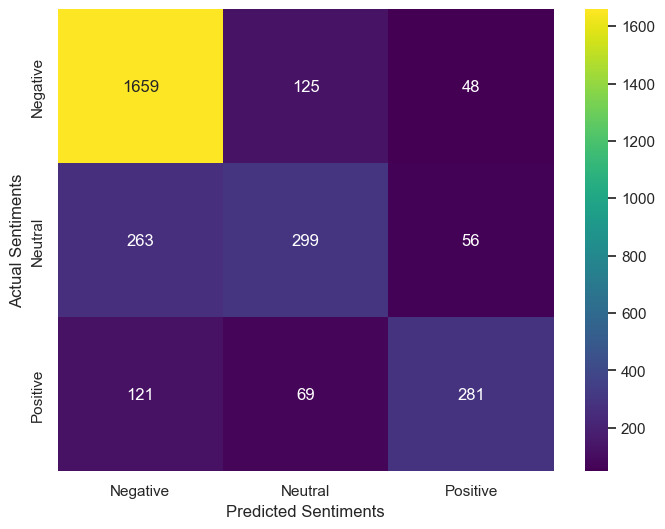

In [63]:
# Plotting the Confusion Matrix for model_1:

print('\033[0m' , '\033[92m' , 'Confusion Matrix (' ,  
      '\033[1m' , '\033[91m' , 'Model 1' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

plot_cm(y_test, y_result_1)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Model shows the best performance on Negative Sentiments where 1,659 out of 1,832 Sentiments have been correctly classified (Around 90.56% of Negative Sentiments have been correctly classified).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Model performance on Posiitive Sentiments is bad where only 281 out of 471 Sentiments have been correctly classified (Around 59.66% of Posiitive Sentiments have been correctly classified).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Model performance on Neutral Sentiments is terrible where only 299 out of 618 Sentiments have been correctly classified (Around 48.38% of Neutral Sentiments have been correctly classified). Such low value of accuracy is expected due to the nature of Words used in Neutral Tweets as well as the similarity between such tweets and Negative Tweets (263 of Neutral Sentiments have been wrongly classified as Negative Sentiments).

Words Cloud (Top 40 Features):


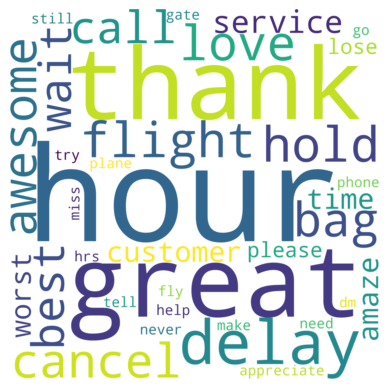

In [64]:
# Plotting the Words Cloud for top 40 Features:

print('\033[0m' , '\033[92m' , 'Words Cloud (' , 
      '\033[1m' , '\033[91m' , 'Top 40 Features' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

all_features = bow_vec.get_feature_names_out()
top_features = ''
feat = model_1.feature_importances_
features = np.argsort(feat)[::-1]

for i in features[0:40]:
    top_features += all_features[i]
    top_features += ' '
  
wordcloud = WordCloud(background_color='white' , colormap='viridis' , width=2000 , height=2000).generate(top_features)

plt.imshow(wordcloud , interpolation='bilinear')
plt.figure(1 , figsize=(14,11) , frameon='equal')
plt.axis("off")
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** A good indicator on the most important words that have been used by the Model to classify the Tweets into Positive, Neutral, and Negative Sentiments.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** While the words like "hour", "thank", and "great" have the highest importance, other words like "hrs", help", "tell", and "go" have the lowest one.

In [65]:
# Counting the Occurance of selected Words (From Feature_Importance):

words = ['hour' , 'great' , 'thank' , 'awesome' , 'amaze' , 'time' , 'help' , 'tell' , 'cancel']

for word in words:
    word_count = data['text'].str.count(word).sum()
    
    print('\033[0m' , '\033[92m' , 'Word Count (' , 
          '\033[1m' , '\033[92m' , word ,
          '\033[0m' , '\033[92m' , ') = ' , 
          '\t\033[1m' , '\033[91m' , word_count , sep='')    

Word Count (hour) = 	1178
Word Count (great) = 	354
Word Count (thank) = 	1832
Word Count (awesome) = 	125
Word Count (amaze) = 	103
Word Count (time) = 	1061
Word Count (help) = 	1104
Word Count (tell) = 	510
Word Count (cancel) = 	1060


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Although of some words have high occurrence in the corpus like time and help, their impact on predicting/Classifying is low.

<left> <font size=5 style='font-family:Courier New' color='Orange' > **5.1 Term Frequency - Inverse Document Frequency (TF-IDF):**  

In [66]:
# Building the Vocabulary:

tfidf_vec = TfidfVectorizer(max_features=4000)
data_features = tfidf_vec.fit_transform(data['text']).toarray()
data_features.shape

(14604, 4000)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Similar to Bag of Words, selecting a Vocabulary Size of 4,000 will result in presenting each Tweet/Document as a Vector of length equals to 4,000.

In [67]:
# Viewing the Vocabulary:

print('Vocabulary: \n' , tfidf_vec.vocabulary_)

Vocabulary: 
 {'say': 3135, 'plus': 2694, 'add': 52, 'commercials': 724, 'experience': 1280, 'not': 2393, 'today': 3600, 'must': 2316, 'mean': 2191, 'need': 2341, 'take': 3488, 'another': 181, 'trip': 3652, 'really': 2871, 'aggressive': 85, 'blast': 458, 'entertainment': 1208, 'guests': 1558, 'face': 1298, 'little': 2063, 'recourse': 2891, 'big': 431, 'bad': 337, 'thing': 3552, 'seriously': 3204, 'would': 3937, 'pay': 2605, 'flight': 1382, 'seat': 3166, 'play': 2684, 'fly': 1402, 'va': 3761, 'yes': 3972, 'nearly': 2339, 'every': 1246, 'time': 3584, 'vx': 3801, 'ear': 1127, 'go': 1515, 'away': 319, 'miss': 2253, 'prime': 2758, 'opportunity': 2478, 'men': 2208, 'without': 3900, 'hat': 1595, 'well': 3858, 'amaze': 147, 'arrive': 242, 'hour': 1684, 'early': 1130, 'good': 1523, 'know': 1968, 'suicide': 3436, 'second': 3172, 'lead': 2014, 'death': 907, 'among': 158, 'teens': 3515, 'pretty': 2749, 'much': 2310, 'better': 420, 'great': 1540, 'deal': 905, 'already': 134, 'think': 3554, 'nd': 23

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Dictionary created using TF-IDF Mechanism is identical to the one that has been previously created using BOW Mechanism.

In [68]:
# Viewing the Non-Zero Elements in a sample TFIDF-Vector:

sample_tfidf = []
for i in data_features[9901]:
    if i !=0:
        sample_tfidf.append(i)
print(sample_tfidf)

[0.27812138559272515, 0.2739767170377052, 0.20675456632650563, 0.5173882884154752, 0.37728645272704703, 0.2936652998641357, 0.254907311785361, 0.37359662094373375, 0.3225067645383602]


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Unlike BOW Mechanism where elements have been encoded using Integer Numbers, TF-IDF represent the elements using Float Numbers (Due to the Division and existing of Log).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Although of different numerical representation of elements, the No. of Non-Zero elements is the same for both BOW and TF-IDF).

In [69]:
# Splitting the Dataset into Independent and Dependent/Target Variables:

X = data_features                                             
y = data['airline_sentiment']

In [70]:
# Splitting the Independent and Dependent Variables into Training and Testing Subsets:

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 1 , stratify = y)

In [71]:
# Checking the Shapes of Dataset, Training, and Testing Subsets:

print('\033[1m' , '\033[91m' , 'Dataset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'Dataset Shape: ' , data.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Subsets:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X Shape: ' , X.shape , sep='')
print('\033[0m' , '\033[92m' , 'y Shape: ' , y.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Training Subset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X_train Shape: ' , X_train.shape , sep='')
print('\033[0m' , '\033[92m' , 'y_train Shape: ' , y_train.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Testing Subset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X_test Shape: ' , X_test.shape , sep='')
print('\033[0m' , '\033[92m' , 'y_test Shape: ' , y_test.shape , sep='')

Dataset:
Dataset Shape: (14604, 2)

----------------------------------------

Subsets:
X Shape: (14604, 4000)
y Shape: (14604,)

----------------------------------------

Training Subset:
X_train Shape: (11683, 4000)
y_train Shape: (11683,)

----------------------------------------

Testing Subset:
X_test Shape: (2921, 4000)
y_test Shape: (2921,)


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Using 0.80 - 0.20 Splitting Ratio, Training and Testing Subsets have been created.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Each Document/Tweet in the Training and Testing Subsets has been encoded using TF-IDF Mechanism; The result is a Vector of Length equals to 4,000.

In [72]:
# Checking the Sentiments of Dataset, Training, and Testing Subsets:

print('\033[1m' , '\033[91m' , 'Dataset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'Positive Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(data['airline_sentiment'].value_counts()['positive']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(data['airline_sentiment'].value_counts()['positive']/len(data['airline_sentiment'])*100) , sep='')

print('\033[0m' , '\033[92m' , 'Neutral Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(data['airline_sentiment'].value_counts()['neutral']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(data['airline_sentiment'].value_counts()['neutral']/len(data['airline_sentiment'])*100) , sep='')

print('\033[0m' , '\033[92m' , 'Negative Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(data['airline_sentiment'].value_counts()['negative']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(data['airline_sentiment'].value_counts()['negative']/len(data['airline_sentiment'])*100) , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'y_train:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'Positive Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_train.value_counts()['positive']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_train.value_counts()['positive']/len(y_train)*100) , sep='')

print('\033[0m' , '\033[92m' , 'Neutral Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_train.value_counts()['neutral']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_train.value_counts()['neutral']/len(y_train)*100) , sep='')

print('\033[0m' , '\033[92m' , 'Negative Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_train.value_counts()['negative']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_train.value_counts()['negative']/len(y_train)*100) , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'y_test:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'Positive Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_test.value_counts()['positive']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_test.value_counts()['positive']/len(y_test)*100) , sep='')

print('\033[0m' , '\033[92m' , 'Neutral Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_test.value_counts()['neutral']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_test.value_counts()['neutral']/len(y_test)*100) , sep='')

print('\033[0m' , '\033[92m' , 'Negative Sentiments: ' , 
      '\033[1m' , '\033[91m' , '\t{:,}'.format(y_test.value_counts()['negative']) ,
      '\033[1m' , '\033[94m' , '\t{:.2f}%'.format(y_test.value_counts()['negative']/len(y_test)*100) , sep='')

Dataset:
Positive Sentiments: 	2,354	16.12%
Neutral Sentiments: 	3,091	21.17%
Negative Sentiments: 	9,159	62.72%

----------------------------------------

y_train:
Positive Sentiments: 	1,883	16.12%
Neutral Sentiments: 	2,473	21.17%
Negative Sentiments: 	7,327	62.72%

----------------------------------------

y_test:
Positive Sentiments: 	471	16.12%
Neutral Sentiments: 	618	21.16%
Negative Sentiments: 	1,832	62.72%


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** As observed, the Distribution of Classes (Sentiments) has been maintained; i.e.: Ratio of Sentiments has been kept the same across y_train and y_test.

In [73]:
# Building the Model:

model = RandomForestClassifier(n_estimators=10 , n_jobs=4 , random_state=1)

In [74]:
# Fitting the Model on Training Subset:

model = model.fit(X_train , y_train)

print('\033[0m' , '\033[92m' , 'Model Parameters: ' , '\033[90m' , model , sep='')

print('\033[0m' , '\033[92m' , 'Average Cross Validation Score: ' , '\033[90m' , '{:.4f}'.format(np.mean(cross_val_score(model , X_train , y_train , cv=5))) , sep='')

Model Parameters: RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=1)
Average Cross Validation Score: 0.7577


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Default Random Forest Classefier using 10 Base Learners, 5 Folds, and TF-IDF Vectorization Mechanism is able to offer an Accuracy equals to 0.7577 on Training Subset.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Slight improvement has been acheived using TF-IDF as the Accuracy has increased from 0.7545 using BOW to 0.7577 using TF-IDF (0.0032).

In [75]:
# Calculating the Average Cross Validation Score (Accuracy) for different Base Learners:

start_time = time.time()

base_ln = [x for x in range(1,101,10)]
cv_accuracy = [] 

for b in base_ln:
    clf = RandomForestClassifier(n_estimators=b , n_jobs=4 , random_state=1)                                                
    scores = cross_val_score(clf , X_train , y_train , cv = 5 , scoring = 'accuracy')          
    cv_accuracy.append(scores.mean())

end_time = time.time()
elapsed_time_2 = end_time - start_time
print('\033[1m' , '\033[94m' , '\nExecution Time = ' , '{:.5f}'.format(elapsed_time_2) , ' Seconds!' , sep='')


Execution Time = 275.56326 Seconds!


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Although the high Computational Cost is still noted in both BOW and TF-IDF, TF-IDF looks slower than BOW (Around 40 Seconds as difference in the favor of BOW).

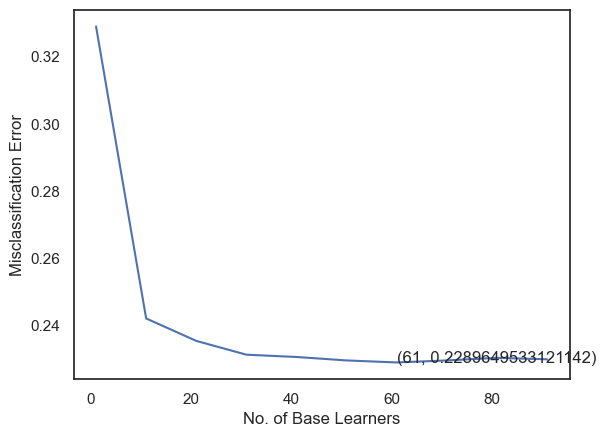

In [76]:
# Plotting the Average Classification Error (1 - Accuracy) for different Base Learners:

error = [1 - x for x in cv_accuracy]
optimal_learners = base_ln[error.index(min(error))]
plt.plot(base_ln , error)
xy = (optimal_learners , min(error))
plt.annotate('(%s, %s)' % xy , xy = xy , textcoords='data')
plt.xlabel("No. of Base Learners")
plt.ylabel("Misclassification Error")
plt.show();

In [77]:
print('\033[0m' , '\033[92m' , 'Optimal Model: ' , '\n' , 
      '\033[0m' , '\033[92m' , 'Base Learners = ' ,  
      '\033[1m' , '\033[91m' , optimal_learners , '\n' , 
      '\033[0m' , '\033[92m' , 'Accuracy = ' ,  
      '\033[1m' , '\033[91m' ,'{:.5f}'.format(1 - min(error)) , '\n' ,
      '\033[0m' , '\033[92m' , 'Error = ' ,  
      '\033[1m' , '\033[91m' ,'{:.5f}'.format(min(error)) , sep='')

Optimal Model: 
Base Learners = 61
Accuracy = 0.77104
Error = 0.22896


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** The best Random Forest Classefier with the highest Accuracy/lowest Error has been acheived using 61 Base Learners.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Such model has an accuracy of 0.77104 on Training Subset.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Model built using TF-IDF has a slight higher accuracy than the model built using BOW; Accuracy has been increased from 0.76693 using BOW to 0.77104 using TF-IDF (0.00411).

In [78]:
# Building the Model using the best Base Learners:

model_2 = RandomForestClassifier(n_estimators=optimal_learners , n_jobs=4 , random_state=1)

In [79]:
# Fitting the Model on Training Subset:

model_2 = model_2.fit(X_train , y_train)

print('\033[0m' , '\033[92m' , 'Model Parameters: ' , '\033[90m' , model_2 , sep='')

Model Parameters: RandomForestClassifier(n_estimators=61, n_jobs=4, random_state=1)


In [80]:
# Evaluating the Model on Testing Subset:

print('\033[0m' , '\033[92m' , 'Accuracy (Testing Subset) = ' ,  
      '\033[1m' , '\033[91m' ,'{:.5f}'.format(model_2.score(X_test , y_test)) , sep='')

Accuracy (Testing Subset) = 0.77200


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** The best Random Forest Classefier has an accuracy of 0.77200 on Testing Subset.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Accuracy on Training Data (0.77104) is close to it's value on Testing Data (0.77200).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Inspite of low Accuracy, such Model is generalized well without Overfitting the training data.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Again, the model built using TF-IDF has better accuracy on Testing Subset than the model built using BOW; Accuracy has been increased from 0.76652 using BOW to 0.77200 using TF-IDF (0.00548).

In [81]:
# Finding the Model's Predictions:

y_result_2 =  model_2.predict(X_test)

Confusion Matrix (Model 2):


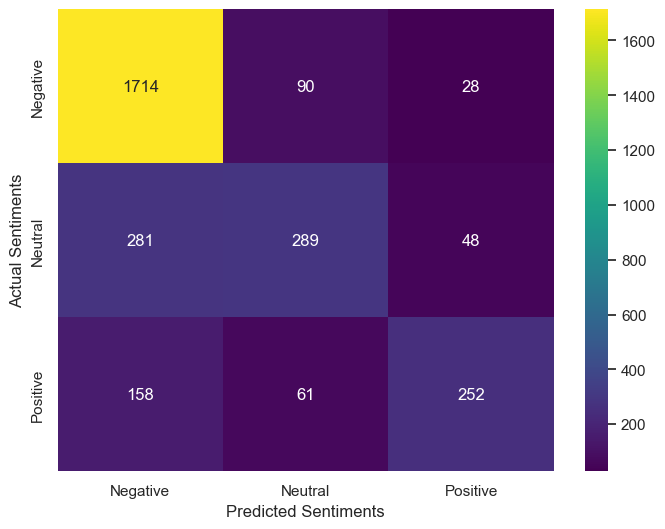

In [82]:
# Plotting the Confusion Matrix for model_2:

print('\033[0m' , '\033[92m' , 'Confusion Matrix (' ,  
      '\033[1m' , '\033[91m' , 'Model 2' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

plot_cm(y_test, y_result_2)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Model shows the best performance on Negative Sentiments where 1,714 out of 1,832 Sentiments have been correctly classified (Around 93.56% of Negative Sentiments have been correctly classified).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Model performance on Posiitive Sentiments is bad where only 252 out of 471 Sentiments have been correctly classified (Around 53.50% of Posiitive Sentiments have been correctly classified).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Model performance on Neutral Sentiments is terrible where only 289 out of 618 Sentiments have been correctly classified (Around 46.76% of Neutral Sentiments have been correctly classified). Such low value of accuracy is expected due to the nature of Words used in Neutral Tweets as well as the similarity between such tweets and Negative Tweets (281 of Neutral Sentiments have been wrongly classified as Negative Sentiments).
<br> <left> <font size=3 style='font-family:Courier New' color='blue'> **-** Overall; Although an imrovement in classifying the Negative Sentiments has been acheived using TF-IDF, a degrade in classifying both Neutral and Positive Sentiments is well noted (TF-IDF performs better in terms of Negative Sentiments Classification while BOW performs better in terms of Neutral and Positive Sentiments Classification).

Words Cloud (Top 40 Features):


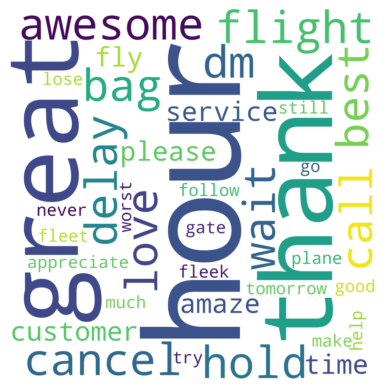

In [83]:
# Plotting the Words Cloud for Top 40 Features:

print('\033[0m' , '\033[92m' , 'Words Cloud (' , 
      '\033[1m' , '\033[91m' , 'Top 40 Features' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

all_features = tfidf_vec.get_feature_names_out()
top_features = ''
feat = model_2.feature_importances_
features = np.argsort(feat)[::-1]

for i in features[0:40]:
    top_features += all_features[i]
    top_features += ' '
  
wordcloud = WordCloud(background_color='white' , colormap='viridis' , width=2000 , height=2000).generate(top_features)

plt.imshow(wordcloud , interpolation='bilinear')
plt.figure(1 , figsize=(14,11) , frameon='equal')
plt.axis("off")
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** A good indicator on the most important words that have been used by the Model to classify the Tweets into Positive, Neutral, and Negative Sentiments.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** While the words like "hour", "thank", and "great" have the highest importance, other words like "plane", "gate", and "go" have the lowest one.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** We may say that the reason behind better performance of Model 2 over Model 1 in terms of Classifying the Negative Sentiments is the occurance of Words - By nature - that indicate the Negative Feelings like hold and cancel.
 <br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** In spite of small changes between high importance words in both BOW and TF-IDF, very high similarity is well noted especially in terms of the larger words like "great", "hour", and "thank"; Additionally, some words appear in both but with different sizes.

In [84]:
# Counting the Occurance of selected Words (From Feature_Importance):

words = ['hour' , 'great' , 'thank' , 'delay' , 'flight' , 'worst' , 'fleek' , 'fly' , 'call']

for word in words:
    word_count = data['text'].str.count(word).sum()
    
    print('\033[0m' , '\033[92m' , 'Word Count (' , 
          '\033[1m' , '\033[92m' , word ,
          '\033[0m' , '\033[92m' , ') = ' , 
          '\t\033[1m' , '\033[91m' , word_count , sep='') 

Word Count (hour) = 	1178
Word Count (great) = 	354
Word Count (thank) = 	1832
Word Count (delay) = 	1024
Word Count (flight) = 	5831
Word Count (worst) = 	290
Word Count (fleek) = 	153
Word Count (fly) = 	927
Word Count (call) = 	874


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Although of some words have low occurrence in the corpus like time and great, their impact on predicting/Classifying is high.

<left> <font size=5 style='font-family:Courier New' color='Blue' > **Models Summary:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** 2 Random Forest Models have been built to classify the Tweets according to the Sentiments they contain into Positive, Neutral, and Negative.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** 2 Vectorization Techniques have been used to encode the Documents which are BOW (Used in Model 1) and TF-IDF (Used in Model 2); Accordingly:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **a.** Model 1 uses 91 Base Learners and able to provide Accuracy equals to 0.76693 on Training Date and 0.76652 on Testing Data.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **b.** Model 2 uses 61 Base Learners and able to provide Accuracy equals to 0.77104 on Training Date and 0.77200 on Testing Data.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **c.** Model 1 has classified the Sentiments into Negative, Neutral, and Positive with an Accuracy equals to 90.56%, 48.38%, and 59.66% respectively.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **d.** Model 2 has classified the Sentiments into Negative, Neutral, and Positive with an Accuracy equals to 93.56%, 46.76%, and 53.50% respectively.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **e.** The most important features used by Model 1 are: "thank", "Great", "hour", "delay", "flight", "hold", and "love".
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **f.** The most important features used by Model 2 are: "thank", "Great", "hour", "delay", "cancel", "awesome", "hold", "love", and "bag".

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Accordingly:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **a.** Model 2 performs - Slightly - better than Model 1 in terms of Average Accuracy on both Training and Testing Subsets (Improvement: 0.3% --> 0.4%).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **b.** While Model 2 performs better than Model 1 in classifying the Negative Sentiments, Model 1 performs better in classifying both Positive and Neutral Sentiments.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **c.** Model 1 requires - slightly - less time to be trained than Model 2.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **d.** Almost, both models have obvious similarity in the most important features (Derived from Words Cloud). 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **e.** Despite above points, both models failed to have good classification scores on both Positive and Neutral Sentiments (Especially for Neutral Sentiments).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **f.** Despite higher Accuracy of Model 2 comparing with Model 1, both models have poor Accuracy which is around 77%; Nevertheless, They generalized without any sign of Over-Fitting.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Using different ML Algorithms, additional Text Pre-Processing Techniques, and different Vectorization Methods may help in increasing the MOdel's Accuracy.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **6. Business Recommendations:**

<left> <font size=3 style='font-family:Courier New' color='Black'> **-** Initially, it's important to list the deficiencies and weakness points in provided dataset before moving into recommendations:
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **a.** Classes suffer from imbalance, both Positive and Neutral Sentiments are represented much less than Negative Sentiments.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **b.** No. of Tweets per some Airline Companies is quite less than others.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **c.** Low confidence in classifying the classes as either Positive or Neutral (Especially the Neutral).

<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Consequently, in order to be able to build a better model with higher accuracy and more generalization capabilities, below points must be taken seriously:
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **a.** More Tweets that express Positive and Neutral Feelings must be added to the dataset to gain better balance between the 3 types of sentiments.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **b.** Tweets that describe or speak about the experience with lower represented Airline Companies must be added to be able to give a Neutral Judgment.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **c.** Although of long time that is required to re-investigate the Classes/Labels, it might be unavailable due to the low confidence in classifying both Positive and Neutral Classes.

<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Nevertheless, we were able to build a simple ML Model that can classify the feelings included in customer tweets into Positive, Neutral, and Negative Sentiments with an Accuracy equals to 77%. 

<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Speaking about Airline Companies, we would like to draw their attention to the most importance things they must be aware of in order to have a better reputation as well as avoid losing their customers:
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **a.** Although all Airline Companies suffer from high rate of complaints on social media "Twitter"; "United", "US Airways", and "American" Airline Companies must take such phenomena seriously more than others since their customers are really disappointed!
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **b.** Social Medias are considered as double-edged sword, it has unbelievable ability to market the positive sides as well as the negative and dark sides of customers experience; Hence, Airline Companies must have dedicated and specialized team to monitor and observe the customers reviews/feedbacks/tweets and suggest the most effective and suitable methods to avoid any bad reputation that can be published due to Negative Sentiments.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **c.** Airline Companies must be proactive and not wait till see the bad reviews spreading among the social medias; Thus, customer satisfaction survey must be conducted during each flight to investigate the deffeciencies and work to solve it accordingly.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **d.** The Customer Service is the core of any business; Hence, knowing that the most complaints are related to such part must raise a flag of something critical and unacceptable is going on!
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **e.** Airline Companies have the opportunity to invest more in improving and training their current staff on the best practises in Customer Service as well as hiring a talented staff.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **f.** Establishing a dedicated channels to receive the complaints and work to solve it could prevent the customers from heading to the social medias to complain their bad experience.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **g.** Whatever the procedures taken by the Airline Companies to solve customer complaints, a reply on the same social media will be fruitful; People who are reading the complaint must feel that the Airline Company care alot about their customers and work intensively and genially to solve their issues.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **h.** Depending upon the complaint types and the severity of each, Airline Companies may offer the affected customer discounts, gifts, or rewards (Miles); If applicable, asking the customer to flag his tweet as solved or replying to his tweet with such compensation will greatly help in marketing the Airline Company as a premium choice for others.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **i.** In addition to original tweets that  deliver the bad reviews of customers experience, retweeting such tweets may indicate similar cases with same bad feelings; Thus, Airline Companies must expect larger size of disappointed customers.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **j.** Apart from Customer Service, Airline Companies must care about the other keywords ("Late Flight", "Cancelled Flight", "Lost Luggage", etc.) in customer complaints and work professionally on either solving them or reducing their effects.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **k.** It's all about improving your services, offering the best experiences and memories to your customer, understanding them and their needs, welcoming their complaints and solve it, and finally, be creative and standing out from the other competitors.

<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Eventually, applying the above recommendations will greatly help the Airline Companies to reduce the Negative Feedbacks of their customers as well as establishing permanent plans to improve the services and eliminate the deficiencies.